In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from swarm_ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [2]:
%matplotlib auto

Using matplotlib backend: <object object at 0x000002B3AD6125C0>


In [3]:
%matplotlib inline

In [4]:
x = np.arange(1, 5, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.zeros(shape=(len(dataX)))

for sample in range(len(dataX)):
    data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

In [5]:
mf1 = [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["1","2"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["1","2"])

Parametry początkowe:
Przesłanki:  [[[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]], [[1, 0.25, 0.5, 0.5], [2, 0.25, 0.5, 0.5], [3, 0.25, 0.5, 0.5], [4, 0.25, 0.5, 0.5], [5, 0.25, 0.5, 0.5]]] 
Konkluzje:  [[0.01177712 0.75672734 0.71069199]
 [0.42167937 0.17594834 0.49180818]
 [0.14575589 0.85024566 0.31741293]
 [0.52952508 0.50286949 0.2324465 ]
 [0.31355842 0.70670603 0.59532497]
 [0.9121651  0.47371833 0.17084276]
 [0.22141658 0.7348542  0.80945716]
 [0.35619078 0.63389293 0.3753571 ]
 [0.48347701 0.7447644  0.95101153]
 [0.77168427 0.22287587 0.60572624]
 [0.6252857  0.62983292 0.82429244]
 [0.77917801 0.00345624 0.39430798]
 [0.9941786  0.77770483 0.96140168]
 [0.97859808 0.23603896 0.20612132]
 [0.14034848 0.65192435 0.82568286]
 [0.68187658 0.8163763  0.00494935]
 [0.54816705 0.83033481 0.80648303]
 [0.02910586 0.28172091 0.91166255]
 [0.60598817 0.49462532 0.24362975]
 [0.80500636 0.12596761 0.5556561 ]
 [0.71829771 0.24

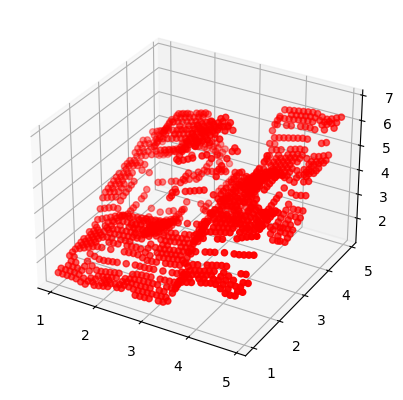

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Current lowest error: 1155.9062: 100%|██████████| 1000/1000 [14:41<00:00,  1.13it/s]

Optymalizacja zakończona!
z blędem:   1155.9061568874388
Liczba it:  1000
TIME elapsed:  881.5786328315735


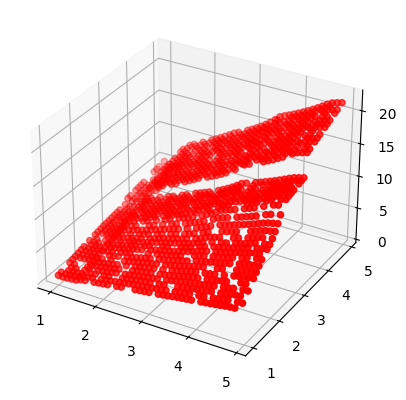

In [7]:
start = time.time()
fis.train(True, True, False, True, n_iter=1000, n_swarmlings=500, first_conf=0.5, second_conf=0.75)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

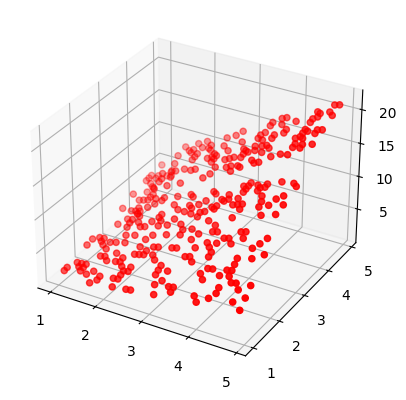

In [8]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

# y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
# y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
mf1 = {"1": [1, 0.25, 0.5, 0.5],
       "2": [2, 0.25, 0.5, 0.5],
       "3": [3, 0.25, 0.5, 0.5],
       "4": [4, 0.25, 0.5, 0.5],
       "5": [5, 0.25, 0.5, 0.5],
}

times = []
confusion_matrices = []
results = []

for test in range(2, 6):
    x = np.arange(1, test, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.zeros(shape=(len(dataX)))

    for sample in range(len(dataX)):
        data_labels[sample] = round(dataX[sample]) * round(dataY[sample])

    varX = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])
    varY = FuzzyInputVariable_List_Trapezoids(list(mf1.values())[:test], "XAxis", list(mf1.keys())[:test])

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=1000, n_swarmlings=500, first_conf=0.5, second_conf=0.75)
    end = time.time()

    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = list(map(round,y_pred.flatten()))

    times.append(end - start)
    results.append(result)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    # print(confusion_matrix(y_test, y_pred))

Current lowest error: 7.5167: 100%|██████████| 1000/1000 [02:33<00:00,  6.51it/s]


Optymalizacja zakończona!
z blędem:   7.51671871082722
Liczba it:  1000


Current lowest error: 95.2590: 100%|██████████| 1000/1000 [03:48<00:00,  4.38it/s]


Optymalizacja zakończona!
z blędem:   95.25898749665794
Liczba it:  1000


Current lowest error: 518.1149: 100%|██████████| 1000/1000 [05:37<00:00,  2.96it/s]


Optymalizacja zakończona!
z blędem:   518.114942738722
Liczba it:  1000


Current lowest error: 1066.3322: 100%|██████████| 1000/1000 [08:36<00:00,  1.94it/s]

Optymalizacja zakończona!
z blędem:   1066.3321863059507
Liczba it:  1000


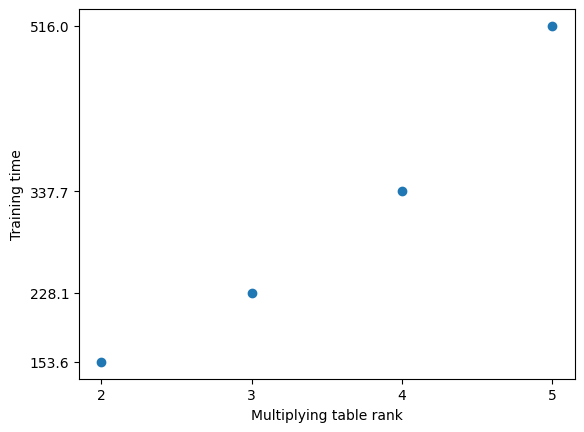

In [22]:
plt.scatter(range(2,6), times)
plt.xlabel('Multiplying table rank')
plt.xticks(range(2,6))
plt.ylabel('Training time')
plt.yticks(times)
plt.show()

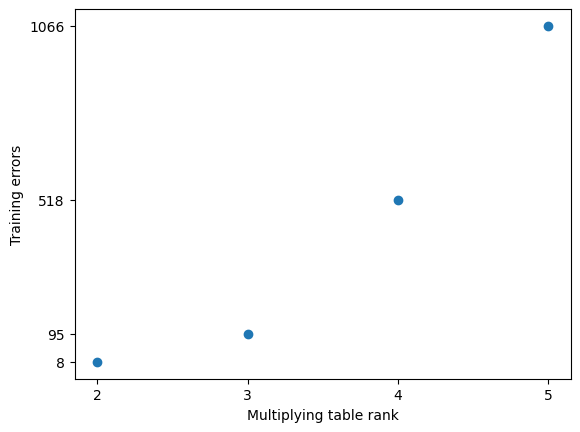

In [23]:
plt.scatter(range(2,6), results)
plt.xlabel('Multiplying table rank')
plt.xticks(range(2,6))
plt.ylabel('Training errors')
plt.yticks(results)
plt.show()